In [3]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Training dataset
df_train = pd.read_excel(r'C:\Users\Ayushi\Data_Train.xlsx')
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
#Testing Dataset
df_test = pd.read_excel(r'C:\Users\Ayushi\Test_set.xlsx')
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
#Shape of the Training Dataset
df_train.shape

(10683, 11)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df_train.duplicated().sum()

220

In [8]:
df_test.duplicated().sum()

26

In [9]:
df_train.drop_duplicates(inplace=True)
df_test.drop_duplicates(inplace=True)

In [10]:
#Splitting Date_of_Journey to form 3 new columns, month,date,year
df_train['date']=df_train['Date_of_Journey'].str.split('/').str[0]
df_train['month']=df_train['Date_of_Journey'].str.split('/').str[1]
#df_train['year']=df_train['Date_of_Journey'].str.split('/').str[2]

In [11]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03


In [12]:
#Changing the datatype from str to int
df_train['month'] = df_train['month'].astype('int')
df_train['date'] = df_train['date'].astype('int')
#df_train['year'] = df_train['year'].astype('int')

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10463 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10463 non-null  object
 1   Date_of_Journey  10463 non-null  object
 2   Source           10463 non-null  object
 3   Destination      10463 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10463 non-null  object
 6   Arrival_Time     10463 non-null  object
 7   Duration         10463 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10463 non-null  object
 10  Price            10463 non-null  int64 
 11  date             10463 non-null  int32 
 12  month            10463 non-null  int32 
dtypes: int32(2), int64(1), object(10)
memory usage: 1.0+ MB


In [14]:
#Since there's no need of Date_of_Journey now. hence we are dropping it
df_train.drop('Date_of_Journey',axis=1,inplace=True)

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10463 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10463 non-null  object
 1   Source           10463 non-null  object
 2   Destination      10463 non-null  object
 3   Route            10462 non-null  object
 4   Dep_Time         10463 non-null  object
 5   Arrival_Time     10463 non-null  object
 6   Duration         10463 non-null  object
 7   Total_Stops      10462 non-null  object
 8   Additional_Info  10463 non-null  object
 9   Price            10463 non-null  int64 
 10  date             10463 non-null  int32 
 11  month            10463 non-null  int32 
dtypes: int32(2), int64(1), object(9)
memory usage: 980.9+ KB


In [16]:
#We just require the time and not the date and month 
df_train['Arrival_Time'] = df_train['Arrival_Time'].str.split(' ').str[0]

In [17]:
#Extracting hours and minutes
df_train['Arrival_hour'] = df_train['Arrival_Time'].str.split(':').str[0]
df_train['Arrival_min'] = df_train['Arrival_Time'].str.split(':').str[0]

In [18]:
#Changing there datatype as int
df_train['Arrival_hour'] = df_train['Arrival_hour'].astype('int')
df_train['Arrival_min'] = df_train['Arrival_min'].astype('int')

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10463 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10463 non-null  object
 1   Source           10463 non-null  object
 2   Destination      10463 non-null  object
 3   Route            10462 non-null  object
 4   Dep_Time         10463 non-null  object
 5   Arrival_Time     10463 non-null  object
 6   Duration         10463 non-null  object
 7   Total_Stops      10462 non-null  object
 8   Additional_Info  10463 non-null  object
 9   Price            10463 non-null  int64 
 10  date             10463 non-null  int32 
 11  month            10463 non-null  int32 
 12  Arrival_hour     10463 non-null  int32 
 13  Arrival_min      10463 non-null  int32 
dtypes: int32(4), int64(1), object(9)
memory usage: 1.0+ MB


In [20]:
#dropping Arrival Time
df_train.drop('Arrival_Time',axis=1,inplace=True)

In [21]:
#Following the same procedure for Departure Time as we followed for Arrival time
df_train['dep_hour'] = df_train['Dep_Time'].str.split(':').str[0]
df_train['dep_min'] = df_train['Dep_Time'].str.split(':').str[0]
df_train['dep_hour'] = df_train['dep_hour'].astype('int')
df_train['dep_min'] = df_train['dep_min'].astype('int')
df_train.drop('Dep_Time',axis=1,inplace=True)

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10463 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10463 non-null  object
 1   Source           10463 non-null  object
 2   Destination      10463 non-null  object
 3   Route            10462 non-null  object
 4   Duration         10463 non-null  object
 5   Total_Stops      10462 non-null  object
 6   Additional_Info  10463 non-null  object
 7   Price            10463 non-null  int64 
 8   date             10463 non-null  int32 
 9   month            10463 non-null  int32 
 10  Arrival_hour     10463 non-null  int32 
 11  Arrival_min      10463 non-null  int32 
 12  dep_hour         10463 non-null  int32 
 13  dep_min          10463 non-null  int32 
dtypes: int32(6), int64(1), object(7)
memory usage: 980.9+ KB


In [23]:
#Duration is supposed to be the differnce between arrival time and departure time
duration  = list(df_train['Duration'])
for i in range(len(duration)):
  if len(duration[i].split()) != 2 :
    if 'h' in duration[i]:
      duration[i] = duration[i].strip()+" 0m"
    else :
      duration[i] = "0h "+duration[i]


Duration_hours = []
Duration_min = []
for i in range(len(duration)):
    Duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    Duration_min.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [24]:
df_train["Duration_hours"] = Duration_hours
df_train["Duration_mins"] = Duration_min

df_train.drop(['Duration'],axis=1,inplace=True)

In [25]:
df_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,date,month,Arrival_hour,Arrival_min,dep_hour,dep_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,1,1,22,22,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,13,13,5,5,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,4,4,9,9,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,23,23,18,18,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,21,21,16,16,4,45


**Handling Categorical Data**

In [26]:
df_train['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [27]:
df_train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

**Nominal Variable**

In [28]:
#Coverting Total_Stops column to numerical column
df_train['Total_Stops']= df_train['Total_Stops'].map({'non-stop':0,'2 stops':1,'1 stop':2,'3 stops':3,'4 stops':4,np.nan:2})

In [29]:
df_train['Total_Stops']= df_train['Total_Stops'].astype('int')

In [30]:
#Since we have stops columns which is related to Route, we doesn't require Route columns
df_train.drop(['Route'],axis=1,inplace=True)

In [31]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,date,month,Arrival_hour,Arrival_min,dep_hour,dep_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,1,1,22,22,2,50
1,Air India,Kolkata,Banglore,1,No info,7662,1,5,13,13,5,5,7,25
2,Jet Airways,Delhi,Cochin,1,No info,13882,9,6,4,4,9,9,19,0
3,IndiGo,Kolkata,Banglore,2,No info,6218,12,5,23,23,18,18,5,25
4,IndiGo,Banglore,New Delhi,2,No info,13302,1,3,21,21,16,16,4,45


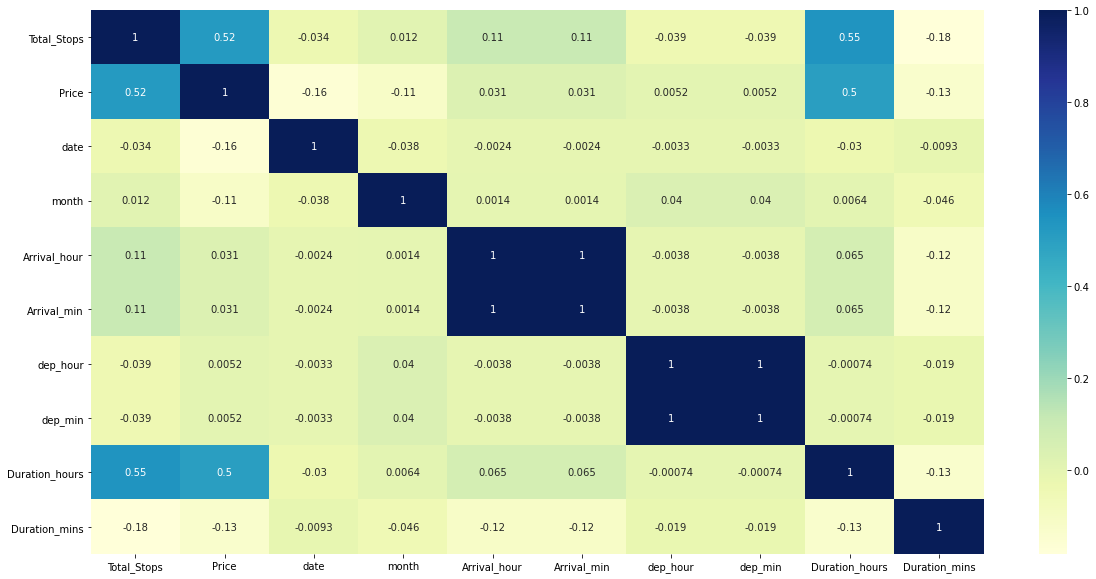

In [32]:
plt.figure(figsize=(20,10))
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

**Ordinal Variable**

In [33]:
#Arlines names handling 
df_train.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [34]:
#Source handling
df_train.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [35]:
df_train.Source.value_counts()

Delhi       4346
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [36]:
#Destination Handling
df_train.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [37]:
df_train.Destination.value_counts()

Cochin       4346
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [38]:
#Additional_Info
df_train.Additional_Info.value_counts()

No info                         8183
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [39]:
df_train.drop('Additional_Info',axis=1,inplace=True)

In [40]:
Airline = df_train[['Airline']]

Airline= pd.get_dummies(Airline,drop_first=True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [41]:
Destination = df_train[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [42]:
Source = df_train['Source']

Source= pd.get_dummies(Source,drop_first=True)

Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [43]:
df_train = pd.concat([df_train,Destination,Source,Airline],axis=1)

In [44]:
df_train.drop(["Airline", "Source", "Destination",'Arrival_min','dep_min'], axis = 1, inplace = True)

In [45]:
df_train.head()

,Total_Stops,Price,date,month,Arrival_hour,dep_hour,Duration_hours,Duration_mins,Destination_Cochin,Destination_Delhi,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,3897,24,3,1,22,2,50,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,7662,1,5,13,5,7,25,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,13882,9,6,4,9,19,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,2,6218,12,5,23,18,5,25,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2,13302,1,3,21,16,4,45,0,0,...,0,1,0,0,0,0,0,0,0,0


In [46]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10463 entries, 0 to 10682
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10463 non-null  int32
 1   Price                                      10463 non-null  int64
 2   date                                       10463 non-null  int32
 3   month                                      10463 non-null  int32
 4   Arrival_hour                               10463 non-null  int32
 5   dep_hour                                   10463 non-null  int32
 6   Duration_hours                             10463 non-null  int64
 7   Duration_mins                              10463 non-null  int64
 8   Destination_Cochin                         10463 non-null  uint8
 9   Destination_Delhi                          10463 non-null  uint8
 10  Destination_Hyderabad                      104

**Performing all the EDA for TEST_SET**

In [47]:
df_test['month']=df_test['Date_of_Journey'].str.split('/').str[0]
df_test['date']=df_test['Date_of_Journey'].str.split('/').str[1]
#df_test['year']=df_test['Date_of_Journey'].str.split('/').str[2]
df_test['month'] = df_test['month'].astype('int')
df_test['date'] = df_test['date'].astype('int')
#df_test['year'] = df_test['year'].astype('int')
df_test.drop('Date_of_Journey',axis=1,inplace=True)#no need of Date_of_Journey now

print('-------------------------------------------------------')
df_test.info()

df_test['Arrival_Time'] = df_test['Arrival_Time'].str.split(' ').str[0]
#Extracting hours and minutes
df_test['Arrival_hour'] = df_test['Arrival_Time'].str.split(':').str[0]
df_test['Arrival_min'] = df_test['Arrival_Time'].str.split(':').str[0]
#changing there datatype as int
df_test['Arrival_hour'] = df_test['Arrival_hour'].astype('int')
df_test['Arrival_min'] = df_test['Arrival_min'].astype('int')
#we can drop Arrival Time
df_test.drop('Arrival_Time',axis=1,inplace=True)

print('-------------------------------------------------------')
df_test.info()


#Following the same procedure for Departure Time
df_test['dep_hour'] = df_test['Dep_Time'].str.split(':').str[0]
df_test['dep_min'] = df_test['Dep_Time'].str.split(':').str[0]
df_test['dep_hour'] = df_test['dep_hour'].astype('int')
df_test['dep_min'] = df_test['dep_min'].astype('int')
df_test.drop('Dep_Time',axis=1,inplace=True)

print('-------------------------------------------------------')
df_test.info()


#Coverting Total_Stops column to numerical column
df_test['Total_Stops']= df_test['Total_Stops'].map({'non-stop':0,'2 stops':1,'1 stop':2,'3 stops':3,'4 stops':4,'nan':2})
#Since we have stops columns which is related to Route, we doesn't require Route columns
df_test.drop(['Route'],axis=1,inplace=True)

print('-------------------------------------------------------')
df_test.info()


#Duration is supposed to be the differnce between arrival time and departure time

duration  = list(df_test['Duration'])

Duration_hours=[]
Duration_min=[]

for i in range(len(duration)):
  if len(duration[i].split()) != 2 :
    if 'h' in duration[i]:
      duration[i] = duration[i].strip()+" 0m"
    else :
      duration[i] = "0h "+duration[i]


for i in range(len(duration)):
  Duration_hours.append(int(duration[i].split(sep='h')[0]))
  Duration_min.append(int(duration[i].split(sep='m')[0].split()[-1]))

df_test["Duration_hours"] = Duration_hours
df_test["Duration_mins"] = Duration_min

df_test.drop(['Duration'],axis=1,inplace=True)

print('-------------------------------------------------------')
df_test.info()

df_test.drop(['Arrival_min','dep_min'],axis=1,inplace=True)

Airline = df_test[['Airline']]

Airline= pd.get_dummies(Airline,drop_first=True)

Airline.head()

Destination = df_test[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

Source = df_test['Source']

Source= pd.get_dummies(Source,drop_first=True)

Source.head()

df_test = pd.concat([df_test,Destination,Source,Airline],axis=1)

df_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print('-------------------------------------------------------')
df_test.info()


-------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2645 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2645 non-null   object
 1   Source           2645 non-null   object
 2   Destination      2645 non-null   object
 3   Route            2645 non-null   object
 4   Dep_Time         2645 non-null   object
 5   Arrival_Time     2645 non-null   object
 6   Duration         2645 non-null   object
 7   Total_Stops      2645 non-null   object
 8   Additional_Info  2645 non-null   object
 9   month            2645 non-null   int32 
 10  date             2645 non-null   int32 
dtypes: int32(2), object(9)
memory usage: 227.3+ KB
-------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2645 entries, 0 to 2670
Data columns (total 12 columns):
 #   Column           Non-Null Count 

In [48]:
df_test.head()

,Total_Stops,Additional_Info,month,date,Arrival_hour,dep_hour,Duration_hours,Duration_mins,Destination_Cochin,Destination_Delhi,...,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,2,No info,6,6,4,17,10,55,1,0,...,0,0,0,1,0,0,0,0,0,0
1,2,No info,12,5,10,6,4,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2,In-flight meal not included,21,5,19,19,23,45,1,0,...,0,0,0,1,0,0,0,0,0,0
3,2,No info,21,5,21,8,13,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,No info,24,6,2,23,2,50,0,1,...,0,0,0,0,0,0,0,0,0,0


**FEATURE SCALING**

In [49]:
from sklearn.preprocessing import StandardScaler
sc =  StandardScaler()
sc.fit_transform(df_train)

array([[-1.32366036, -1.10924806,  1.24453948, ..., -0.00977671,
        -0.21879627, -0.01693537],
       [-0.23340937, -0.29509405, -1.47188969, ..., -0.00977671,
        -0.21879627, -0.01693537],
       [-0.23340937,  1.04993593, -0.52704476, ..., -0.00977671,
        -0.21879627, -0.01693537],
       ...,
       [-1.32366036, -0.38872717,  1.59885633, ..., -0.00977671,
        -0.21879627, -0.01693537],
       [-1.32366036,  0.78309236, -1.47188969, ..., -0.00977671,
         4.57046183, -0.01693537],
       [-0.23340937,  0.58955509, -0.52704476, ..., -0.00977671,
        -0.21879627, -0.01693537]])

**Feature Selection**

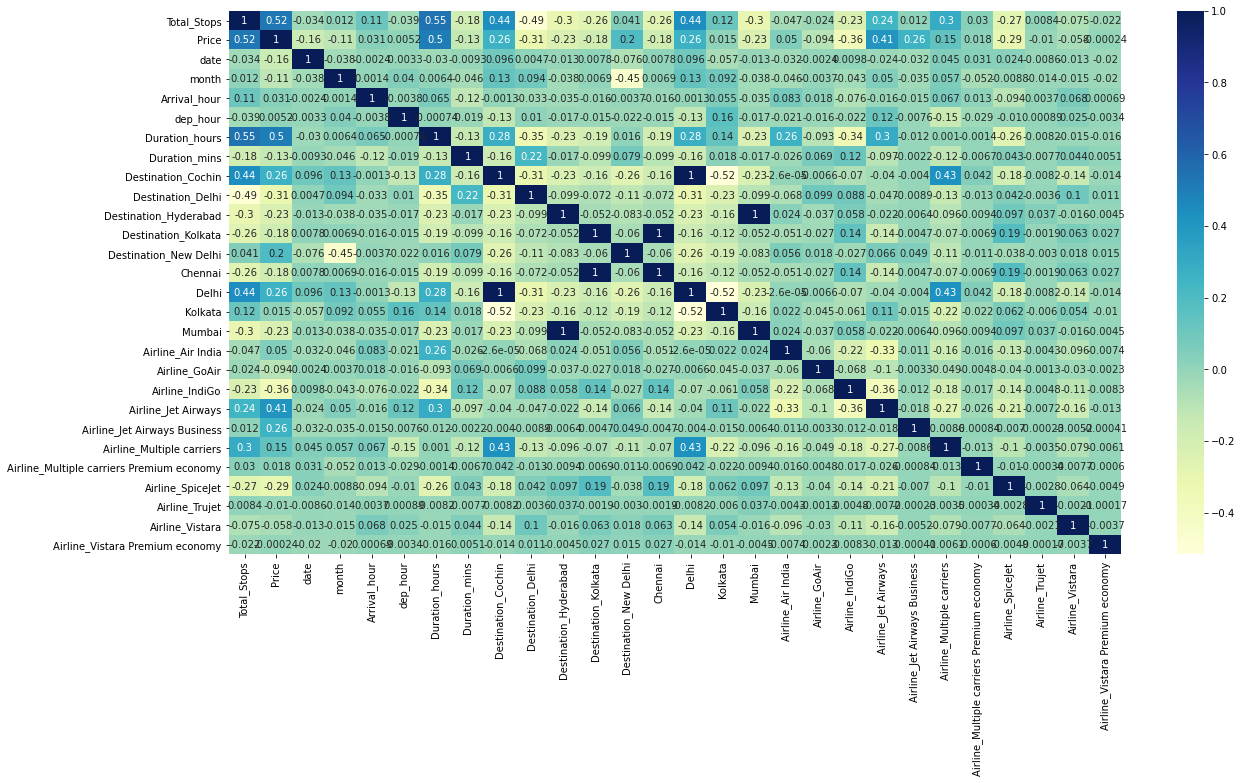

In [50]:
plt.figure(figsize=(20,10))
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [51]:
x = df_train.drop(['Price'],axis=1)
y = df_train['Price']

In [167]:
#x = x.drop(['Arrival_min','dep_min'],axis=1)
#x.head()

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.30,random_state=0)

In [53]:
x_train.head()

,Total_Stops,date,month,Arrival_hour,dep_hour,Duration_hours,Duration_mins,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
6390,0,24,5,18,15,2,35,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5665,2,3,6,12,9,27,35,1,0,0,...,0,0,1,0,0,0,0,0,0,0
6478,2,21,3,23,20,26,30,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2554,2,15,5,9,9,23,40,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5015,2,6,6,4,2,26,10,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [54]:
x_train.columns

Index(['Total_Stops', 'date', 'month', 'Arrival_hour', 'dep_hour',
       'Duration_hours', 'Duration_mins', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy'],
      dtype='object')

In [55]:
x_test.head()

,Total_Stops,date,month,Arrival_hour,dep_hour,Duration_hours,Duration_mins,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
3691,2,24,3,22,7,15,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7996,0,24,4,21,18,2,55,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2895,2,9,6,12,21,14,50,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3859,2,9,5,1,10,15,30,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2586,2,21,3,16,8,7,35,1,0,0,...,0,1,0,0,0,0,0,0,0,0


**RANDOM FOREST REGRESSOR**

In [75]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [76]:
rf.score(x_test,y_test)

0.7877994680420657

In [77]:
rf.score(x_train,y_train)

0.964097580876603

In [78]:
y_predict = rf.predict(x_test)

In [79]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MAE: 1298.4630554715857
MSE: 4624175.584763482
RMSE: 2150.3896355692104


In [80]:
metrics.r2_score(y_test, y_predict)

0.7877994680420657

**HYPERPARAMETER TUNING**

In [58]:
from sklearn.model_selection import RandomizedSearchCV

In [81]:
param={'n_estimators' : [300, 500, 700, 1000, 2100],
            'max_depth' : [3, 5, 7, 9, 11, 13, 15],
            'max_features' : ["auto", "sqrt", "log2"],
            'min_samples_split' : [2, 4, 6, 8]
        }

In [82]:
rscv = RandomizedSearchCV(cv=10,param_distributions=param,estimator=rf)

In [83]:
rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                             

In [182]:
rscv.best_params_

{'max_depth': 15,
 'max_features': 'auto',
 'min_samples_split': 6,
 'n_estimators': 700}

In [84]:
rf1 = RandomForestRegressor(max_depth=15,max_features= 'auto',min_samples_split= 6,n_estimators= 700)
rf1.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=6, min_weight_fraction_leaf=0.0,
                      n_estimators=700, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [85]:
rf1.score(x_train,y_train)

0.9290973345876655

In [86]:
rf1.score(x_test,y_test)

0.7928102905320221

In [87]:
from sklearn import metrics
prediction = rf1.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1303.7073012522264
MSE: 4514982.064823421
RMSE: 2124.848715749764


**XGBRegressor**

In [56]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor()

xg_reg.fit(x_train,y_train)

xg_reg.score(x_train,y_train)

xg_reg.score(x_test,y_test)


0.7988551512579392

In [59]:

param = {'learning_rate' : [0.5, 0.8, 0.1, 0.20, 0.25, 0.30],
            'max_depth' : [3, 5, 7, 9, 11, 13, 15],
            'gamma' : [0.1,0.2, 0.3, 0.4, 0.5],
            'min_child_weight' : [1, 3, 5, 7, 9],
            'colsample_bytree' : [0.5, 0.8, 0.1, 0.20, 0.25, 0.30]}
         
rscv = RandomizedSearchCV(cv=10,param_distributions=param,estimator=xg_reg)
rscv.fit(x_train,y_train)
rscv.best_params_

{'min_child_weight': 7,
 'max_depth': 5,
 'learning_rate': 0.3,
 'gamma': 0.2,
 'colsample_bytree': 0.5}

In [62]:
xg_reg1 = xgb.XGBRegressor(colsample_bytree= 0.5,gamma= 0.1,learning_rate= 0.1,max_depth= 7,min_child_weight= 1)
xg_reg1.fit(x_train,y_train)
print(xg_reg1.score(x_train,y_train))
print(xg_reg1.score(x_test,y_test))

0.919404330213397
0.7958835576463367


In [64]:
from sklearn import metrics
prediction = xg_reg1.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1379.257875576605
MSE: 4448010.85309108
RMSE: 2109.030785240244


**GradientBoostingRegressor**

In [199]:
from sklearn.ensemble import GradientBoostingRegressor
g_reg = GradientBoostingRegressor()

g_reg.fit(x_train,y_train)

g_reg.score(x_train,y_train)

g_reg.score(x_test,y_test)

0.7533301264021866

In [200]:
param = {
            'learning_rate' : [0.5, 0.8, 0.1, 0.20, 0.25, 0.30],
            'n_estimators' : [300, 500, 700, 1000, 2100],
            'criterion' : ['friedman_mse', 'mse']}
         
rscv = RandomizedSearchCV(cv=10,param_distributions=param,estimator=g_reg)
rscv.fit(x_train,y_train)
rscv.best_params_

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-pac

{'criterion': 'mse', 'learning_rate': 0.25, 'n_estimators': 500}

In [201]:
g_reg1 = GradientBoostingRegressor(criterion = 'mse', learning_rate= 0.75, n_estimators= 500)
g_reg1.fit(x_train,y_train)
print(g_reg1.score(x_train,y_train))
print(g_reg1.score(x_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:475: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: C

0.9404690479754932
0.7677316133264497


In [202]:
from sklearn import metrics
prediction = g_reg1.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1459.650453865466
MSE: 5061484.96829004
RMSE: 2249.774426090323


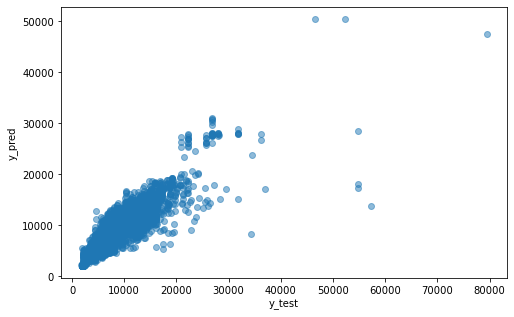

In [93]:
#Plotting graph between predictive value and actual value
plt.figure(figsize = (8,5))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [96]:
import pickle
# open a file, where you ant to store the data
file = open('flight.pkl', 'wb')

# dump information to that file
pickle.dump(rf1, file)

In [98]:
model = open('flight.pkl','rb')
forest = pickle.load(model)

In [99]:
y_prediction = forest.predict(x_test)

In [100]:
metrics.r2_score(y_test, y_prediction)

0.7928102905320221